In [1]:
%matplotlib inline

In [2]:
from keras import layers, models

In [3]:
class ANN(models.Model):
    def __init__(self, Nin, Nh, Nout):
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')

        x = layers.Input(shape=(Nin, ))
        h = relu(hidden(x))
        y = output(h)

        super().__init__(x, y)
        self.compile(
            optimizer='sgd',
            loss='mse'
        )

In [4]:
# from tensorflow.keras import datasets
# from keras import datasets
from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import  train_test_split

In [5]:
def Data_func():
    X, y = datasets.load_boston(return_X_y=True)

    y = y.reshape(-1, 1)

    X_train, X_test, y_train, y_test =\
        train_test_split(X, y, test_size=0.2, random_state=113)
    scaler = preprocessing.MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return (X_train, y_train), (X_test, y_test)

In [6]:
import matplotlib.pyplot as plt

In [7]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

In [8]:
def main():
    Nin = 13
    Nh = 5
    Nout = 1

    model = ANN(Nin, Nh, Nout)
    (X_train, y_train), (X_test, y_test) = Data_func()

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=100,
        validation_split=0.2,
        verbose=2
    )
    performance_test = model.evaluate(X_test, y_test, batch_size=100)
    print(f'Test Loss -> {performance_test:.2f}')

    plot_loss(history)
    plt.show()

Epoch 1/100
4/4 - 0s - loss: 509.4308 - val_loss: 143.2382
Epoch 2/100
4/4 - 0s - loss: 93.4443 - val_loss: 94.2156
Epoch 3/100
4/4 - 0s - loss: 70.6582 - val_loss: 80.8398
Epoch 4/100
4/4 - 0s - loss: 61.2355 - val_loss: 78.2467
Epoch 5/100
4/4 - 0s - loss: 66.6706 - val_loss: 54.0930
Epoch 6/100
4/4 - 0s - loss: 56.7906 - val_loss: 50.9131
Epoch 7/100
4/4 - 0s - loss: 44.6725 - val_loss: 56.5907
Epoch 8/100
4/4 - 0s - loss: 43.1831 - val_loss: 43.7535
Epoch 9/100
4/4 - 0s - loss: 41.3981 - val_loss: 43.0036
Epoch 10/100
4/4 - 0s - loss: 42.3769 - val_loss: 66.6928
Epoch 11/100
4/4 - 0s - loss: 47.0259 - val_loss: 40.5804
Epoch 12/100
4/4 - 0s - loss: 41.1171 - val_loss: 47.5168
Epoch 13/100
4/4 - 0s - loss: 39.6996 - val_loss: 35.0500
Epoch 14/100
4/4 - 0s - loss: 46.9046 - val_loss: 33.2035
Epoch 15/100
4/4 - 0s - loss: 35.7767 - val_loss: 46.2240
Epoch 16/100
4/4 - 0s - loss: 52.2086 - val_loss: 32.0990
Epoch 17/100
4/4 - 0s - loss: 35.3461 - val_loss: 56.4496
Epoch 18/100
4/4 - 0s

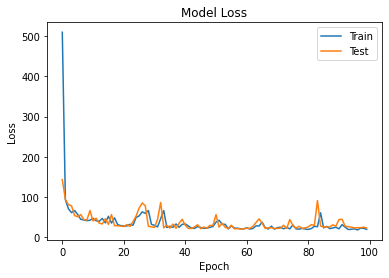

In [9]:
main()